### 손실함수 
#### 어느정도 차이 나는지를 계산해주는 것 , 평균제곱 오차를 줄여주는 게 목적 

In [1]:
import numpy as np

In [3]:
y = [0.1, 0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
true =[0,0,1,0,0,0,0,0,0,0] #레이블이라 가정 

In [6]:
def mean_squared_error(y,t):
    return 0.5 *np.sum((y-t)**2)

In [7]:
mean_squared_error(np.array(y),np.array(true))

0.09750000000000003

In [8]:
y=[0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
mean_squared_error(np.array(y),np.array(true))

0.5975

In [9]:
# 손실함수: 교차 엔트로피 오차 (CEE) Code

def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta)) #y가 0이 들어올때 마이너스 무한대가 발생하지 않도록 작은값 delta 더해줌

In [10]:
t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1,0.05,0.6,0.0,0.05,.1,0.0,0.1,0.0,0.0]
cross_entropy_error(np.array(y),np.array(t))  #1에 가까울수록 error값이 작음

0.510825457099338

In [11]:
y=[0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
cross_entropy_error(np.array(y),np.array(t)) #1에 멀어져서 error값이 높아짐 

2.302584092994546

In [14]:
#손실함수: 미니배치 학습 code

import sys, os
sys.path.append("./dataset")
import numpy as np
import pickle
from mnist_dataset.mnist import load_mnist
import matplotlib.pylab as plt


In [16]:
(x_train, t_train),(x_test,t_test) = load_mnist(normalize = True, one_hot_label = True)
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [17]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [19]:
np.random.choice(60000,10) #열개씩 무작위로 뽑혀나옴 

array([25604, 22695, 25072, 29155, 51169, 50011, 32603, 40090, 59194,
        9509])

### one-hot encoding 용

In [20]:
def cross_entropy_error_one_hot(y,t):
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y))/ batch_size

In [21]:
#label용

def cross_entropy_error_label(y,t):
    if y.ndim ==1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.loh(y[np.arange(batch_size),t]))/batch_size

###  Numerical differentiation

In [31]:
def numerical_differential(f,x):
    h = 1e-4
    return (f(x+h)-f(x-h))/(2*h) # h=0.0001

In [32]:
def function_1(x):
    return 0.01*x**2 +0.1*x

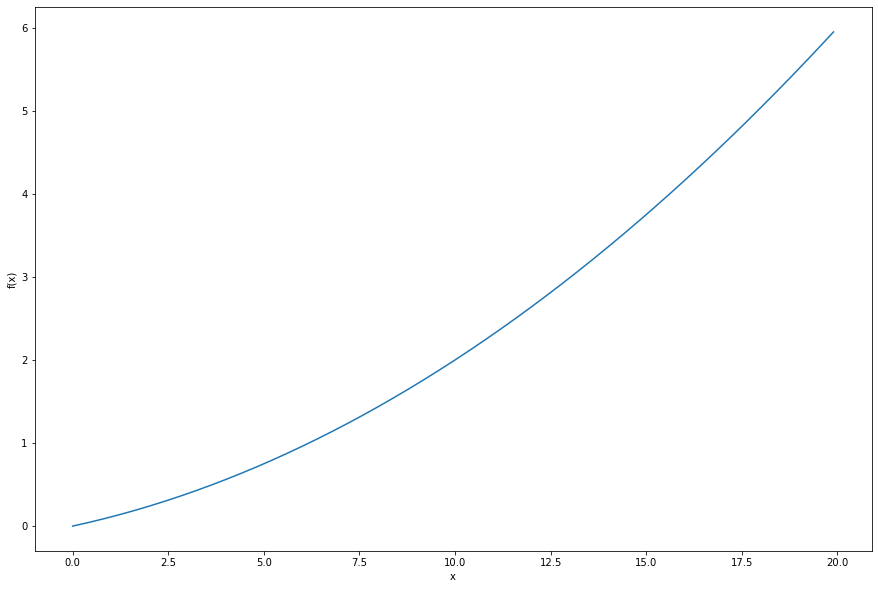

In [33]:
x = np.arange(0.0,20.0,0.1)
y = function_1(x)
plt.figure(figsize = (15,10))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

In [34]:
numerical_differential(function_1,5)

0.1999999999990898

In [35]:
numerical_differential(function_1,10)

0.2999999999986347

In [41]:
def function_2(x):
    return x[0]**2 +x[1]**2

In [54]:
#feature 가 여러개일 때 -> 편미분 사용 (변수별로 따로따로 구함)
# 편미분을 동시에 계산하고 싶을 때 gradient 사용 

def numerical_gradient(f,x):
    h = 1e-4 #0.0001
    grad= np.zeros_like(x) #x와 형상이 같은 배열을 생성 (0.0)이 들어간 배열 생성
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val+h
        fxh1 = f(x)
        #f(x+h) 계산
        
        #f(x-h) 계산
        x[idx] =tmp_val -h
        fxh2 = f(x)
        
        grad[idx] =(fxh1-fxh2)/(2*h)
        x[idx] = tmp_val 
        
    return grad

In [55]:
numerical_gradient(function_2,np.array([3.0,4.0]))

array([6., 8.])

In [56]:
numerical_gradient(function_2,np.array([0.0,2.0]))

array([0., 4.])

In [57]:
numerical_gradient(function_2,np.array([3.0,0.0]))

array([6., 0.])

### 경사하강법

In [58]:
def gradient_descent(f, init_x, lr =0.01, step_num =100):
    x = init_x
    x_history = []
    
    for i in range(step_num):
        x_history.append(x.copy())
        grad = numerical_gradient(f,x)
        x -= lr*grad
    return x, np.array(x_history)

In [59]:
def function_2(x):
    return x[0]**2 +x[1]**2

In [60]:
init_x = np.array([-3.0,4.0])
gradient_descent(function_2, init_x = init_x, lr=0.1, step_num =100)

(array([-6.11110793e-10,  8.14814391e-10]),
 array([[-3.00000000e+00,  4.00000000e+00],
        [-2.40000000e+00,  3.20000000e+00],
        [-1.92000000e+00,  2.56000000e+00],
        [-1.53600000e+00,  2.04800000e+00],
        [-1.22880000e+00,  1.63840000e+00],
        [-9.83040000e-01,  1.31072000e+00],
        [-7.86432000e-01,  1.04857600e+00],
        [-6.29145600e-01,  8.38860800e-01],
        [-5.03316480e-01,  6.71088640e-01],
        [-4.02653184e-01,  5.36870912e-01],
        [-3.22122547e-01,  4.29496730e-01],
        [-2.57698038e-01,  3.43597384e-01],
        [-2.06158430e-01,  2.74877907e-01],
        [-1.64926744e-01,  2.19902326e-01],
        [-1.31941395e-01,  1.75921860e-01],
        [-1.05553116e-01,  1.40737488e-01],
        [-8.44424930e-02,  1.12589991e-01],
        [-6.75539944e-02,  9.00719925e-02],
        [-5.40431955e-02,  7.20575940e-02],
        [-4.32345564e-02,  5.76460752e-02],
        [-3.45876451e-02,  4.61168602e-02],
        [-2.76701161e-02,  3.689

### 신경망 기울기   손실함수를 최소화하기 위한 w를 구하기 위해 진행함

In [86]:
import sys, os
import numpy as np

In [87]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) #정규분포 초기화
        
    def predict(self,x):
        return np.dot(x,self.W)
    
    def loss(self,x,t):
        z = self.predict(x)
        y= softmax(z)
        loss = cross_entropy_error(y,t)
        
        return loss
    

In [88]:
def softmax(matrix):
    maximum_of_matrix = np.max(matrix)
    difference_from_maximum = matrix-maximum_of_matrix
    exponential_of_difference = np.exp(difference_from_maximum)
    sum_of_exponential = np.sum(exponential_of_difference)
    y = exponential_of_difference / sum_of_exponential
    return y

def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

def numerical_gradient(f,x): # 기울기 
    h = 1e-4
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags = ['multi_index'],op_flags = ['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) +h
        fxh1 = f(x)
        
        x[idx] = tmp_val -h
        fxh2 = f(x)
        grad[idx] = (fxh1-fxh2)/(2*h)
        
        x[idx] = tmp_val
        it.iternext()
        
    return grad
        

In [89]:
net = simpleNet()
print(net.W) # 가중치 매개변수

[[-1.09870218 -1.74371477 -0.25803557]
 [ 0.3448891  -0.47321063 -0.03685876]]


In [90]:
x = np.array([0.6,0.9])
p = net.predict(x)
print(p)

[-0.34882112 -1.47211843 -0.18799423]


In [91]:
np.argmax(p)

2

In [92]:
t = np.array([0,0,1]) #p 에서 2번째 값이 참이라고 햇을떄 손실값 
net.loss(x, t)

0.7553385636328112

In [93]:
def f(W): #기울기 구함 
    return net.loss(x,t)

In [94]:
dW = numerical_gradient(f,net.W)
print(dW)

[[ 0.24002997  0.07805912 -0.31808908]
 [ 0.36004495  0.11708868 -0.47713363]]


In [95]:
#좀 더 편리하게 
f = lambda w:net.loss(x,t)
dw = numerical_gradient(f,net.W)

###  2층 신경망 클래스 구현

In [175]:
import sys, os
sys.path.append("./dataset")
import numpy as np
import pickle
from mnist_dataset.mnist import load_mnist
import matplotlib.pylab as plt

In [176]:
def step_function(x):
    return np.array(x >0 , dtype= np.int)
def sigmoid(x):
    return 1/ (1+np.exp(-x))
def relu(x):
    return np.maximum(0,x)
def sigmoid_grad(x):
    return (1.0 -sigmoid(x))*sigmoid(x)

In [177]:
def sigmoid(x):
    return 1/ (1+np.exp(-x))
def sigmoid_grad(x):
    return (1.0 -sigmoid(x))*sigmoid(x)
def relu(x):
    return np.maximum(0,x)
def relu_grad(x):
    grad = np.zeros(x)
    grad[x>=0] =1
    return grad
def softmax(x):
    if x.ndim ==2:
        x = x.T
        x = x -np.max(x,axis=0)
        y = np.exp(x)/np.sum(np.exp(x),axis=0)
        return y.T
    x = x -np.max(x)
    return np.exp(x)/np.sum(np.exp(x))

def mean_squared_error(y,t):
    return 0.5*np.sum((y-t)**2)
def cross_entropy_error(y,t):
    if y.ndim ==1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    if t.size == y.size:
        t = t.argmax(axis =1)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size),t]+1e-7))/batch_size
def softmax_loss(X,t):
    y = softmax(X)
    return cross_entropy_error(y,t)
def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x)
    it = np.nditer(x,flags = ['multi_index'], op_flags = ['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val)+h
        fxh1 = f(x)
        x[idx] =tmp_val-h
        fxh2 = f(x)
        grad[idx] = (fxh1-fxh2)/(2*h)
        x[idx] =tmp_val
        it.iternext()
    return grad
        

In [194]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
    
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        return y
    
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])        
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])        
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])  
        return grads
    
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads={}
        
        batch_num = x.shape[0]
        
        #forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        #backward y값을 뒤쪽으로 계산
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        dz1 = np.dot(dy, W2.T)
        da1 = sigmoid_grad(a1) * dz1
        grads['W1'] = np.dot(x.T, da1)
        grads['b1'] = np.sum(da1, axis=0)
        
        return grads
    
    

In [195]:
net = TwoLayerNet(input_size = 784, hidden_size = 50, output_size =10)

In [196]:
print(net.params["W1"].shape)
print(net.params["b1"].shape)
print(net.params["W2"].shape)
print(net.params["b2"].shape)


(784, 50)
(50,)
(50, 10)
(10,)


In [197]:
x = np.random.rand(100,784)
y = net.predict(x)

In [198]:
x = np.random.rand(100,784)
t = np.random.rand(100,10)

grads = net.numerical_gradient(x,t)

In [199]:
print(grads["W1"].shape)
print(grads["b1"].shape)
print(grads["W2"].shape)
print(grads["b2"].shape)

(784, 50)
(50,)
(50, 10)
(10,)


In [200]:
#미니배치 학습 구현
(x_train, t_train),(x_test,t_test) =load_mnist(normalize =True, one_hot_label =True)


In [201]:
train_loss_list = []

In [202]:
iters_num =10000
train_size = x_train.shape[0]
batch_size = 100 #미니배치크기 100
learning_rate =0.1
iter_per_epoch = max(train_size/batch_size,1)

In [203]:
network = TwoLayerNet(input_size = 784, hidden_size =50, output_size =10)

In [204]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.gradient(x_batch, t_batch)
    
    for key in ('W1','b1','W2','b2'):
        network.params[key]-=learning_rate*grad[key]
        
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch ==0:
        print("loss:"+str(loss))

loss:2.2978110853798785
loss:0.8273235092076965
loss:0.4169643496963497
loss:0.3315141381163576
loss:0.30536451741384885
loss:0.31253259034169345
loss:0.21990135733556568
loss:0.3763100958680581
loss:0.19181262166767205
loss:0.25025629112065745
loss:0.18024534863291483
loss:0.25381105469388987
loss:0.1398479359573926
loss:0.11575064105250403
loss:0.20053492168091022
loss:0.19306258633900267
loss:0.1777729003322579


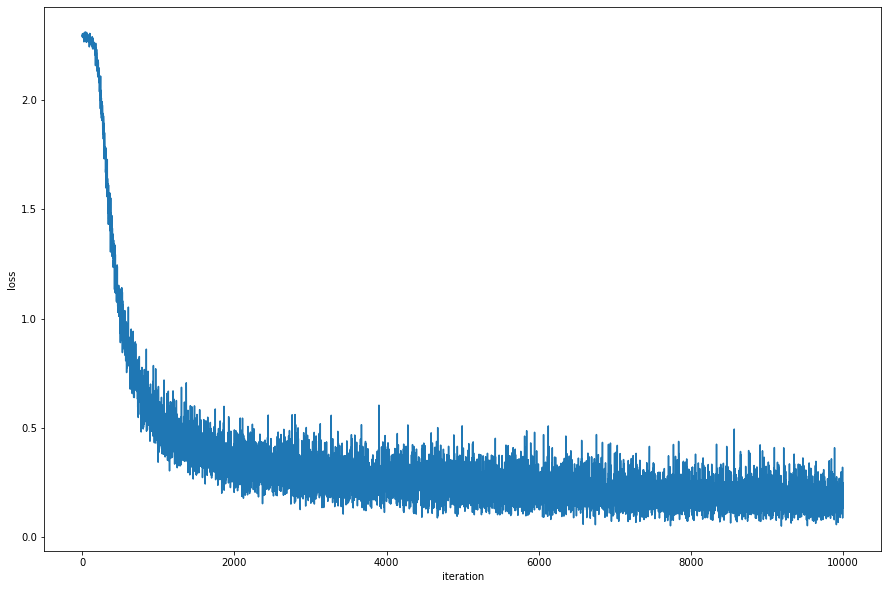

In [207]:
x = np.arange(len(train_loss_list))

plt.figure(figsize =(15,10))
plt.plot(x,train_loss_list, label = 'train acc')
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()

In [208]:
(x_train, t_train),(x_test, t_test) = load_mnist(normalize = True, one_hot_label = True)

In [214]:
train_loss_list = []
train_acc_list = []
test_acc_list = []

In [215]:
iters_num =10000
train_size = x_train.shape[0]
batch_size =100
learning_rate = 0.1
iter_per_epoch - max(train_size/batch_size,1)

0.0

In [216]:
network = TwoLayerNet(input_size =784, hidden_size =50, output_size=10)

In [217]:
# loss값이 떨어지면서 안정적인거 확인 가능, test acc 데이터도 높아짐 
#  accuaracy 향상되는거 볼 수 있음
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.gradient(x_batch, t_batch)
    
    for key in ('W1','b1','W2','b2'):
        network.params[key]-=learning_rate*grad[key]
        
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch ==0:
        train_acc = network.accuracy (x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("loss: " +str(loss)+",train acc: " + str(train_acc)+", test acc: "+str(test_acc))

loss: 2.2957421391267068,train acc: 0.10441666666666667, test acc: 0.1028
loss: 0.9017950555552212,train acc: 0.7969833333333334, test acc: 0.7988
loss: 0.40482743581710506,train acc: 0.8789166666666667, test acc: 0.8829
loss: 0.31230581010573033,train acc: 0.8981166666666667, test acc: 0.9026
loss: 0.3398229924880958,train acc: 0.90825, test acc: 0.9107
loss: 0.35861566800594263,train acc: 0.91415, test acc: 0.918
loss: 0.24625810817638036,train acc: 0.9196166666666666, test acc: 0.9222
loss: 0.4122256581880312,train acc: 0.9233, test acc: 0.9255
loss: 0.2644930317322962,train acc: 0.9275, test acc: 0.9278
loss: 0.32204667868792597,train acc: 0.9303166666666667, test acc: 0.9323
loss: 0.25996717006471004,train acc: 0.9343833333333333, test acc: 0.9362
loss: 0.17285436775316998,train acc: 0.9373, test acc: 0.9366
loss: 0.17244904562481103,train acc: 0.9398, test acc: 0.9395
loss: 0.1740487942899156,train acc: 0.9419333333333333, test acc: 0.9417
loss: 0.2747050446718017,train acc: 0.94

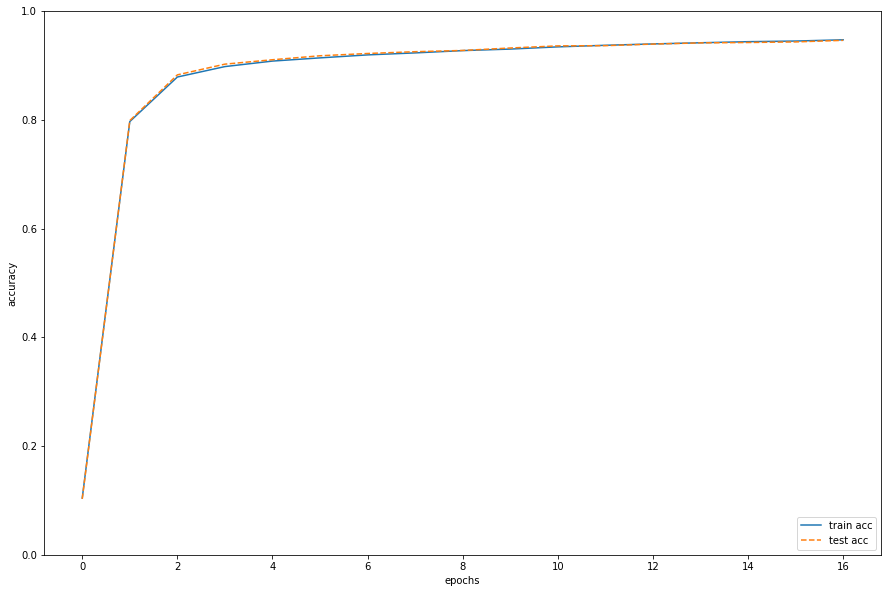

In [218]:
markers = {'train': 'o','test':'s'}
x = np.arange(len(train_acc_list))

plt.figure(figsize =(15,10))
plt.plot(x, train_acc_list, label = 'train acc')
plt.plot(x, test_acc_list, label = 'test acc', linestyle = '--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0,1.0)
plt.legend(loc = 'lower right')
plt.show()